In [2]:
import numpy as np
import matplotlib.pyplot as plt

EXPERIMENTO 1

In [3]:
fm = 60    
A_pp = 10    
A = A_pp / 2 

duration = 3 / fm 
t = np.linspace(0, duration, 1000, endpoint=False)
mensagem = A * np.sin(2 * np.pi * fm * t)

Item a

- Frequência máxima do sinal 60 Hz
- Taxa de Nyquist(2 * fmáx), logo a frequência de amostragem deve ser maior que 120 Hz, para não ocorrer aliasing
- Fs escolhida de 600Hz 

Item b

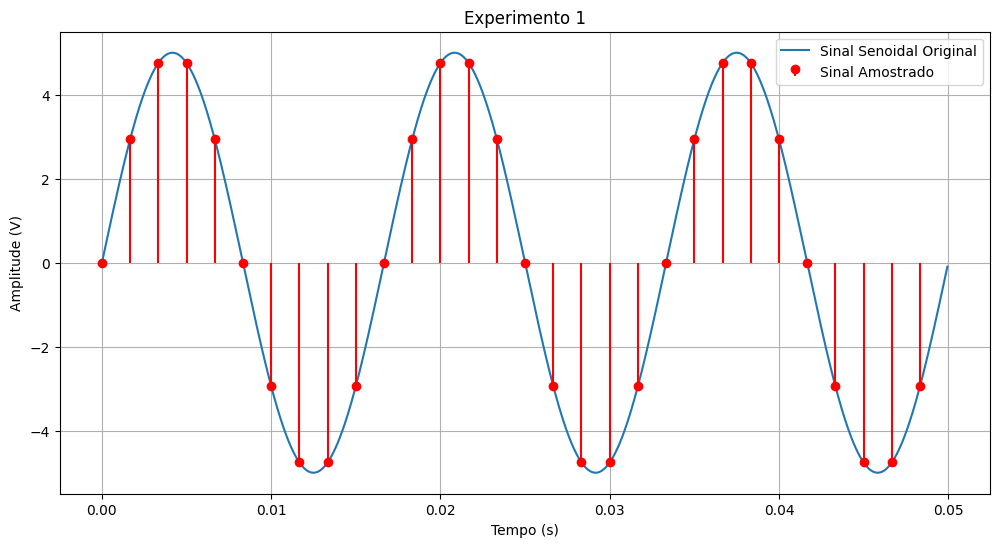

In [4]:
Fs = 600
Ts = 1 / Fs

t_discreto = np.arange(0, duration, Ts)
mensagem_amostrada = A * np.sin(2 * np.pi * fm * t_discreto)

plt.figure(figsize=(12, 6))
plt.plot(t, mensagem, label='Sinal Senoidal Original')
plt.stem(t_discreto, mensagem_amostrada, linefmt='r-', markerfmt='ro', basefmt=' ', label='Sinal Amostrado')
plt.title('Experimento 1')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()

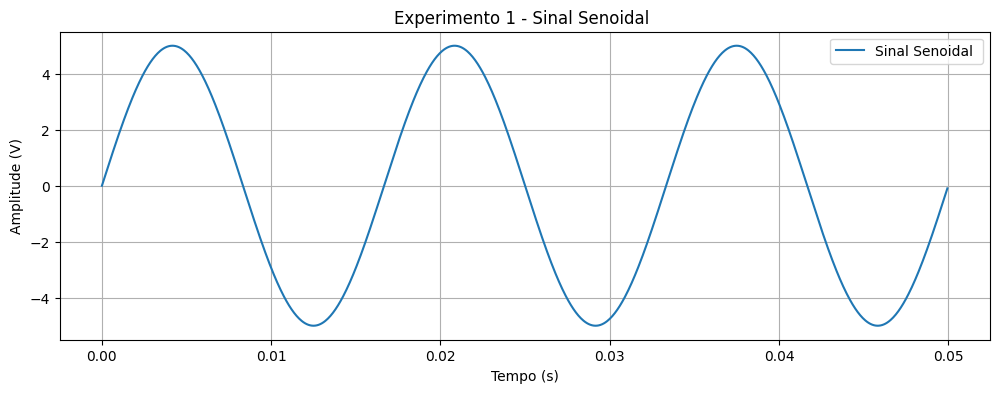

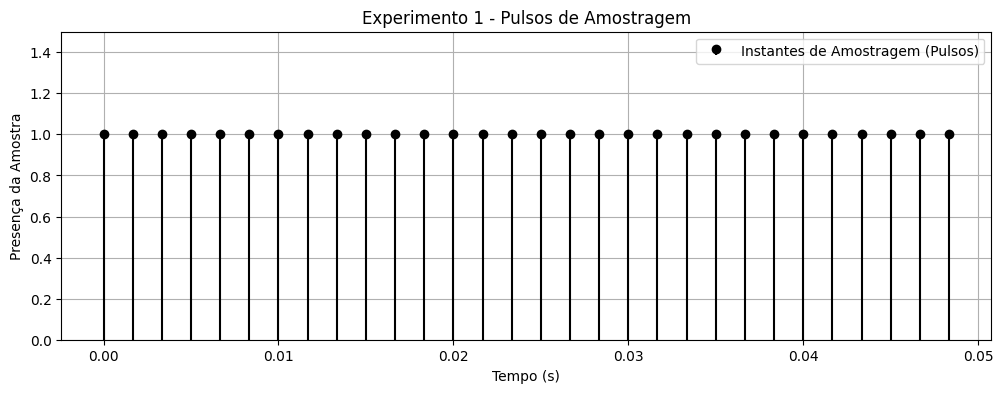

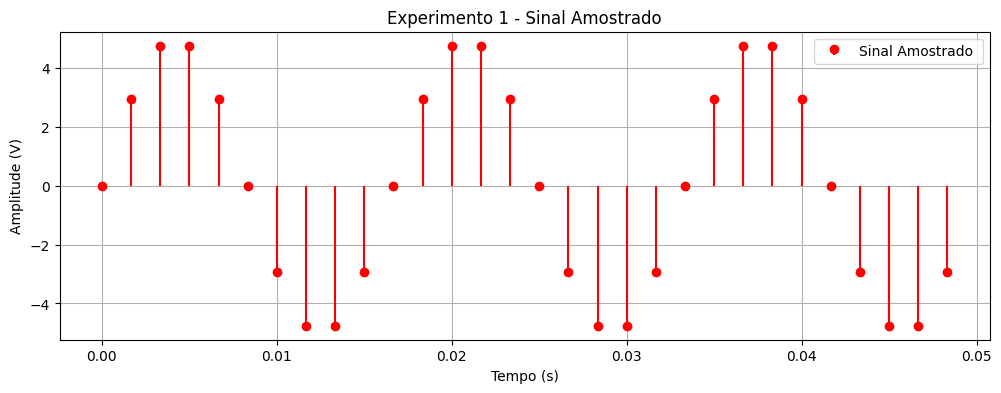

In [5]:

plt.figure(figsize=(12, 4))
plt.plot(t, mensagem, label='Sinal Senoidal ')
plt.title('Experimento 1 - Sinal Senoidal ')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.stem(t_discreto, np.ones_like(t_discreto), linefmt='k-', markerfmt='ko', basefmt=' ', label='Instantes de Amostragem (Pulsos)')
plt.title('Experimento 1 - Pulsos de Amostragem')
plt.xlabel('Tempo (s)')
plt.ylabel('Presença da Amostra')
plt.ylim(0, 1.5) 
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.stem(t_discreto, mensagem_amostrada, linefmt='r-', markerfmt='ro', basefmt=' ', label='Sinal Amostrado ')
plt.title('Experimento 1 - Sinal Amostrado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()

item c 

In [6]:
numero_amostras = len(t_discreto)
print(f" Número de amostras tomadas: {numero_amostras}")

 Número de amostras tomadas: 30


Item d

In [7]:
print(f"Tempo de duração das amostras: {Ts:.6f}s ({Ts*1000:.2f}ms)")

Tempo de duração das amostras: 0.001667s (1.67ms)


EXPERIMENTO 2


Item a

In [8]:
f_nyquist = 2 * fm
amostras = 20
duracao = 3 / fm 

Fs_2 = amostras / duracao 

print(f"Duração Total do Sinal: {duration:.4f} s")
print(f"Taxa de Nyquist (2*fm): {f_nyquist} Hz")
print(f"Taxa de Amostragem Resultante : {Fs_2:.2f} Hz")


Duração Total do Sinal: 0.0500 s
Taxa de Nyquist (2*fm): 120 Hz
Taxa de Amostragem Resultante : 400.00 Hz


Foi utilizado uma taxa de amostragem de 400 Hz, isso por conta que o número de amostras no sinal foi pedido no exercício que era de 20 amostras e foi dividido pela duração do sinal que é de 3 períodos(0.05 segundos)

Item b


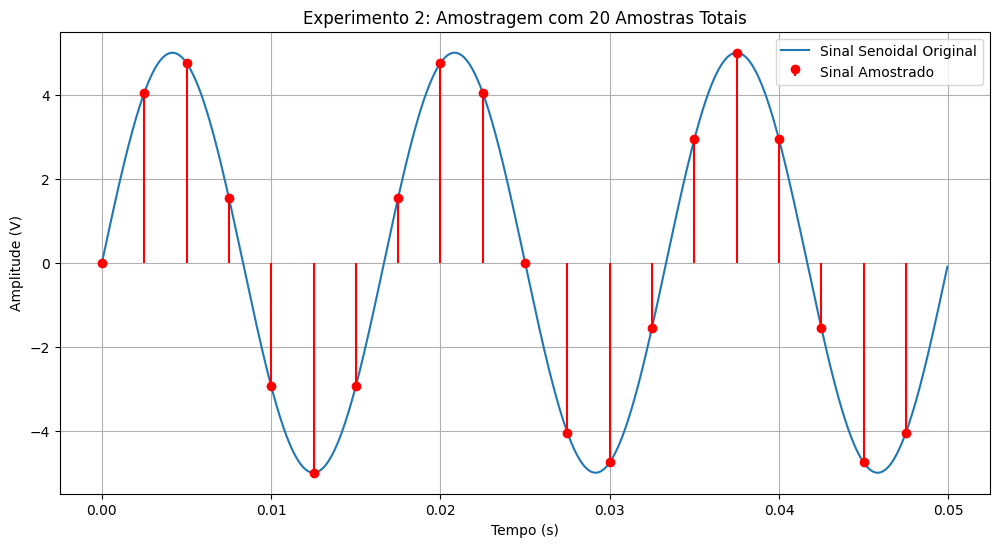

In [9]:
t_2 = np.linspace(0, duration, amostras, endpoint=False)

mensagem_2 = A * np.sin(2 * np.pi * fm * t_2)

plt.figure(figsize=(12, 6))
plt.plot(t, mensagem, label='Sinal Senoidal Original')
plt.stem(t_2, mensagem_2, linefmt='r-', markerfmt='ro', basefmt=' ', label='Sinal Amostrado')
plt.title(f'Experimento 2: Amostragem com 20 Amostras Totais')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()

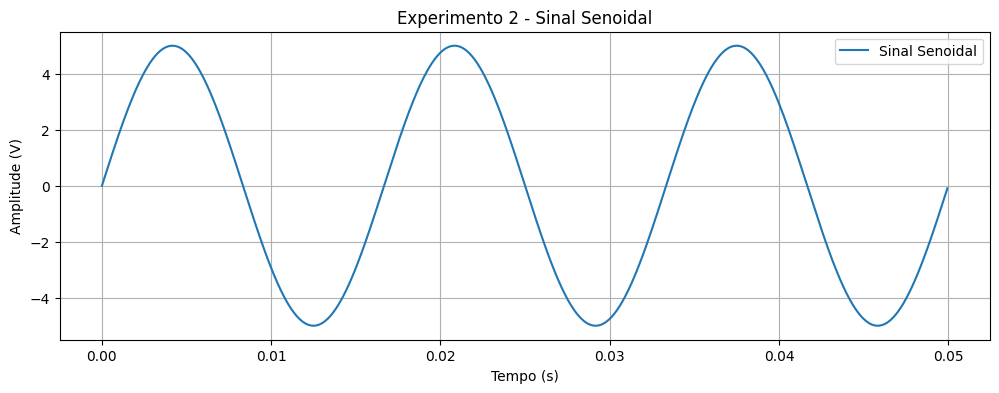

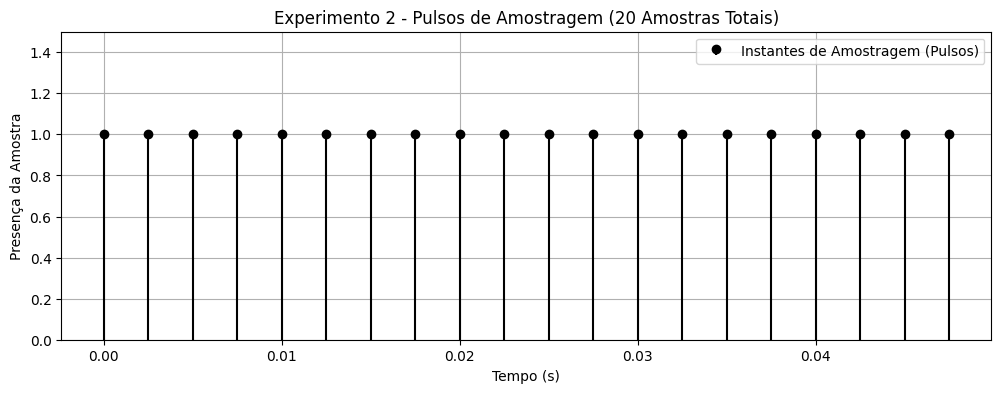

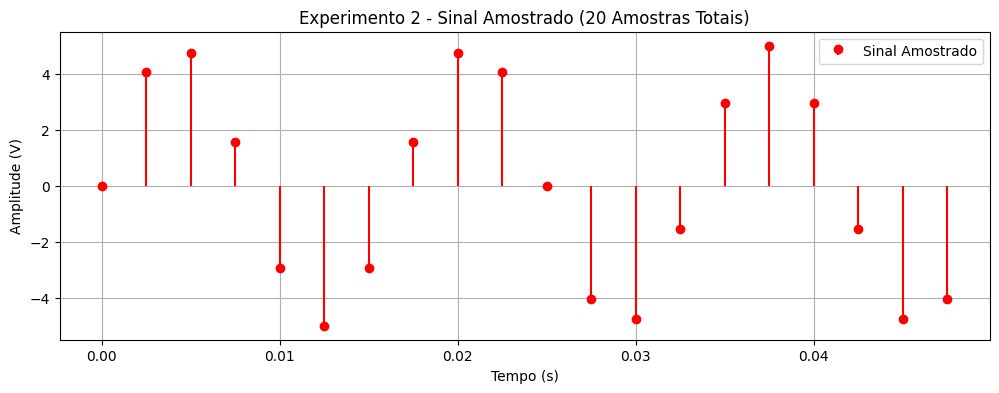

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(t, mensagem, label='Sinal Senoidal')
plt.title('Experimento 2 - Sinal Senoidal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.stem(t_2, np.ones_like(t_2), linefmt='k-', markerfmt='ko', basefmt=' ', label='Instantes de Amostragem (Pulsos)')
plt.title('Experimento 2 - Pulsos de Amostragem (20 Amostras Totais)')
plt.xlabel('Tempo (s)')
plt.ylabel('Presença da Amostra')
plt.ylim(0, 1.5)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.stem(t_2, mensagem_2, linefmt='r-', markerfmt='ro', basefmt=' ', label='Sinal Amostrado')
plt.title('Experimento 2 - Sinal Amostrado (20 Amostras Totais)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()

Item c

In [11]:
Ts_2= 1/Fs_2
print(f"Tempo entre amostras: {Ts_2:.5f} s (ou {Ts_2*1000:.2f} ms)")

Tempo entre amostras: 0.00250 s (ou 2.50 ms)


EXPERIMENTO 3


Item a

In [20]:
n_bits_3 = 3
M_3 = 2**n_bits_3 
print(f"Número de Níveis: {M_3}")

Número de Níveis: 8


Aqui foi utilizado 3 bits, os quais dão 2^3 = 8 níveis de quantização.Foi utilizado poucos bits, o que faz ser possível visualizar o erro de quantização.

Item b

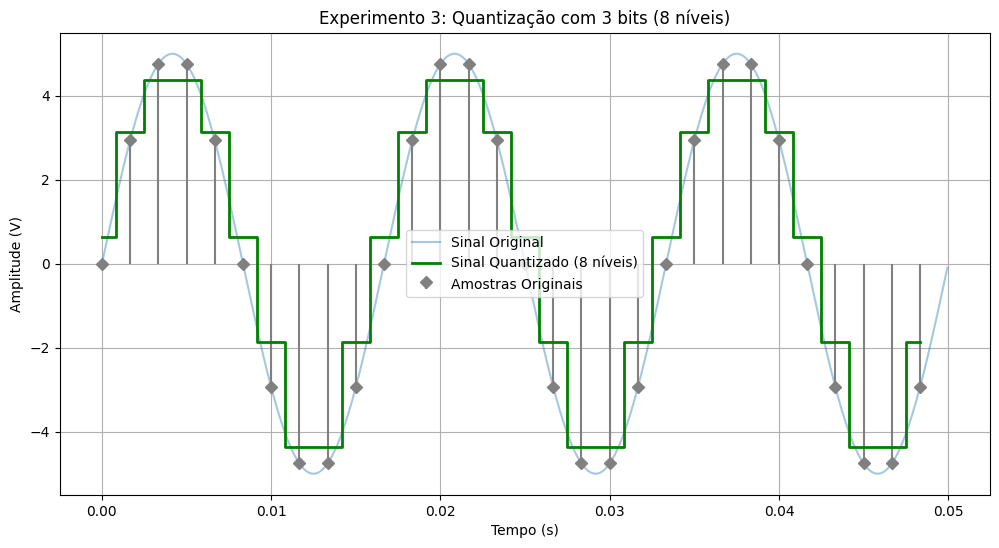

In [21]:
V_min, V_max = -A, A

passo_quantizacao_3 = (V_max - V_min) / M_3

indices_3 = np.round((mensagem_amostrada - V_min) / passo_quantizacao_3)
indices_3 = np.clip(indices_3, 0, M_3 - 1)
mensagem_quantizada_3 = V_min + passo_quantizacao_3/2 + indices_3 * passo_quantizacao_3

plt.figure(figsize=(12, 6))
plt.plot(t, mensagem, label='Sinal Original', alpha=0.4) 
plt.stem(t_discreto, mensagem_amostrada, linefmt='grey', markerfmt='D', basefmt=' ', label='Amostras Originais') 
plt.step(t_discreto, mensagem_quantizada_3, where='mid', label=f'Sinal Quantizado ({M_3} níveis)', color='green', linewidth=2)
plt.title(f'Experimento 3: Quantização com {n_bits_3} bits ({M_3} níveis)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()


Item a

In [24]:
n_bits_5 = 5
M_5 = 2**n_bits_5 

print(f"Número de Níveis: {M_5}")

Número de Níveis: 32


Aqui foi utilizado 5 bits, os quais dão 2^5 = 32 níveis de quantização. Aqui foi utilizado mais bits que o exemplo anterior, o que faz ser possível visualizar a redução do erro de quantização.

Item b

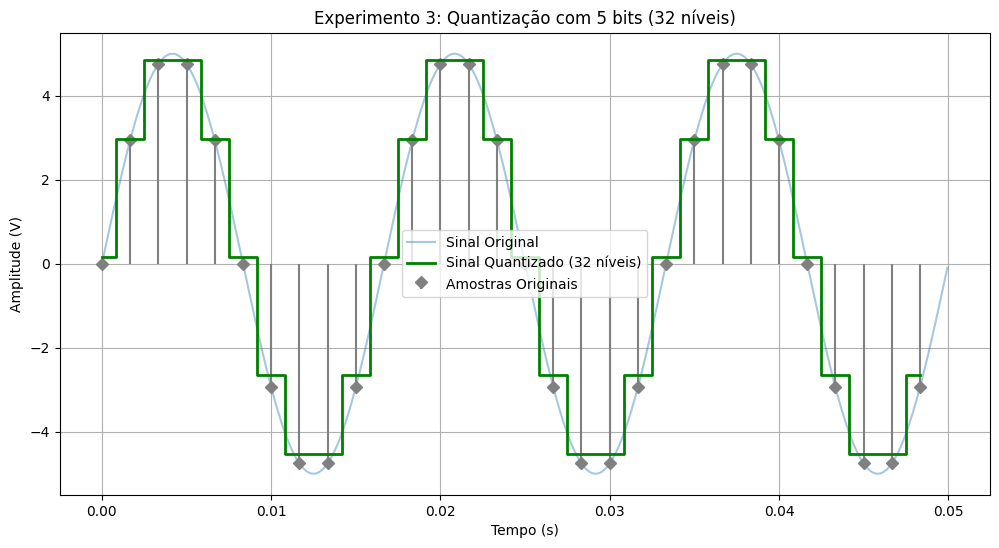

In [25]:
passo_quantizacao_5 = (V_max - V_min) / M_5

indices_5 = np.round((mensagem_amostrada - V_min) / passo_quantizacao_5)
indices_5 = np.clip(indices_5, 0, M_5 - 1)
mensagem_quantizada_5 = V_min + passo_quantizacao_5/2 + indices_5 * passo_quantizacao_5

plt.figure(figsize=(12, 6))
plt.plot(t, mensagem, label='Sinal Original', alpha=0.4)
plt.stem(t_discreto, mensagem_amostrada, linefmt='grey', markerfmt='D', basefmt=' ', label='Amostras Originais')
plt.step(t_discreto, mensagem_quantizada_5, where='mid', label=f'Sinal Quantizado ({M_5} níveis)', color='green', linewidth=2)
plt.title(f'Experimento 3: Quantização com {n_bits_5} bits ({M_5} níveis)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()